# Do que se trata?

Com o VPC podemos levantar recursos usando uma rede isolada definida por nós

O beneficío de seu uso, além de segurança de IP's e trafego de dados é poder usar a escalabilidade da Cloud

**O VPC gerencia a comunicação entre recursos e entre recursos e a internet**

Subnets são redes que compõe o VPC trazendo uma camada de segurança

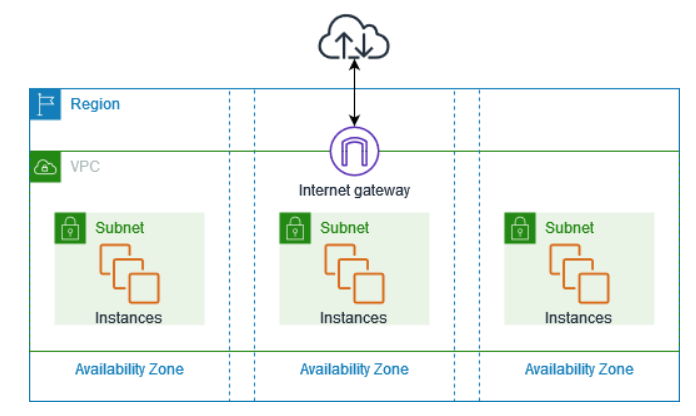



# Componentes básicos

## Availability Zones (AZ)

Se tratam de data center dentro de uma AWS Region com as seguintes caracteristicas:

+ Poder redundnate;
+ Rede;
+ Conectividade

**Podemos usar multiplas AZ para operar aplicações em produção e databases, tornando-as mais disponiveis, tolerantes a falhas e escalaveis  se comparados a um unico data center**

## Classless Inter-Domain Routing (CIDR) Blocks

São formas de designar um range de IPs para as VPCs e Subnets

A quantidade de IPs de um CIDR block de IPv4 é calculada usando a seguinte equação:

$$
2^{\text{32 - CIDR prefix length}}
$$

Em alguns casos o primeiro e ultimo IP são reservados tornando a equação da seguinte maneira

$$
2^{\text{32 - CIDR prefix length}} - 2
$$

## Virtual Private Cloud (VPC)

Se trata de uma rede virtual dedicada a nossa conta AWS onde podemos adicionar Subnets

Se assemelha a uma rede tradicional on-premise que operaríamos nosso data center

As contas AWS vem automaticamente, após 2013-12-04, com um VPC configurado padrão

**O VPC padrão contém um Internet Gateway e cada Subnet padrão é uma Subnet publica**

Com o VPC podemos:

+ Designar ranges de endereços de IP;
+ Adicionar Subnets;
+ Adicionar Gateways;
+ Associar Security Groups.

## Subnets

**São um conjunto de endereços de IP dentro de nosso VPC**

**Cada Subnet deve residir em somente uma AZ**

Com Subnets podemos:

+ Levantar recursos da AWS;
+ Conectar a Subnet à internet;
+ Conectar a Subnet a outros VPCs;
+ Conectar a Subnet aos nossos data centers;
+ Direcionar trafego de modo bidirecional usando Route Tables.

Após a definição de Subnets podemos fazer o deploy de recursos nesse VPC

**Subnets dentro de um VPC padrão são Subnets públicas**

**Cada instancia levantada dentro de uma Subnet padrão tem um IPv4 padrão publico e privado que se comunicam com a internet via Internet Gateway**

Em casos de uma Subnet criada por nós, cada instancia subida nela tem um IPv4 privado e não tem um IPv4 publico, ao menos que especificado quando criado o recurso ou se alterado o atributo de Subnet publico do endereço de IP. **Esse tipo de instancia pode se comunicar entre si mas nao com a internet**

**Para liberarmos acesso de internet de uma Subnet criada por nós devemos atrelar um Internet Gateway ao seu VPC (se ausente) e associar um Elastic IP à instancia**

Outra forma de permitir que uma instancia se **comunique via internet** dentro de um VPC **prevenindo conexões de entrada indesejadas é via uso de NAT**

Em casos de uso de IPv6 CIDR associado ao VPC e o endereço de IPv6 designado a instancia, a conexão é feita, também, via Internet Gateway

**O trafego de IPv6 é diferente do de IPv4** desse modo as **Route Tables** devem conter **Routes distintas para cada tipo protocolo**

## Network Address Translation (NAT)

**Realiza o maepamento de multiplos IPv4 para um único IPv4 publico**

Podemos realizar a configuração usando o Elastic IP e conectar ele a internet via Internet Gateway, isso possiblita que uma Subnet privada se conecte à internet via NAT

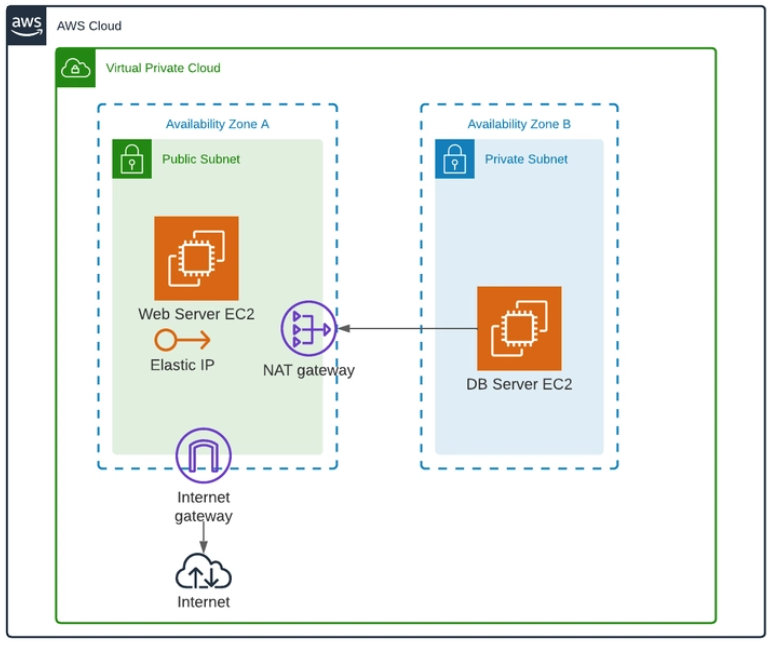

## Security Groups

**Faz o controle de trafego que é permitido de chegar e sair do recurso que esta associado a este Security Group**

Atua como um Firewall

## IP Adressing

Podemos selecionar dois protocolos de IP **IPv4 e IPv6** para nosso VPC e Subnets

## Route Tables

Route Tables permite definir onde o trafego de rede da Subnet ou Gateway é direcionado

Possuem um **conjunto de regras** denominadas de **Routes**

**As Routes definem onde o trafego de rede é direcionado do nosso VPC**

Cada Route tem um range de IPs específicos especificando: 

+ Onde o trafego deve ir (destino do trafego);
+ O Gateway;
+ A interface de rede ou a conexão pela qual o trafego sera enviado (ponto final).

**Se não associarmos explicitamente a Subnet com a Route Table a Subnet é, automaticmanete associada com a Route Table principal (main)**

## Gateway

Realiza a conexão de nosso VPC a outra rede

## Endpoint

Conecta nossos serviços de forma provada sem o uso de Gateway ou dispositivo NAT

## Peering Connections

É usado para fazer rota de trafego entre recursos de VPC diferentes de modo privado se comportando como se estivessem no mesmo VPC

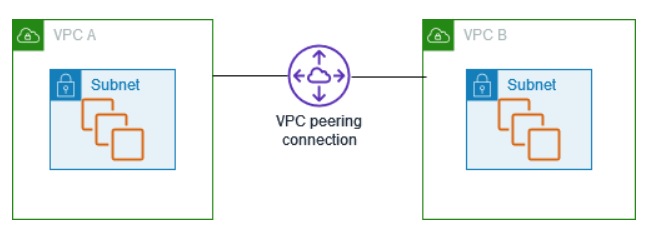

## Traffic Mirroring (não entendi)

## Transit Gateways

Atua como um hub central que faz a rota entre VPCs, conexões de VPN, AWS Direct Connect e Transit Gateway Peering Connections

Atua como um roteador virtual regional para o trafego entre quem o possui atrelado

## VPC Flow Logs

Realiza o registro de trafego de IPs entre interfaces de rede do nosso VPC

## VPC Connections

Permite a conexão com redes on-premise usando o AWS Virtual Private Network (AWS VPN)

# Precificação (overview)

O custo de baseia nos componentes do VPC

Praticamente todos os recursos levantados na VPC geram um IP para conectividade, sendo a maioria IPv4 privados

**Recursos que demandam diretamente de acesso a internet usando IPv4 são IPv4 publicos**

**Qualquer endereço de IPv4 provisionados serão cobrados**

# Como funciona o VPC

Podemos ter uma visualização de como os compenentes se conversam no console. Como exemplo podemos observar o diagrama abaixo

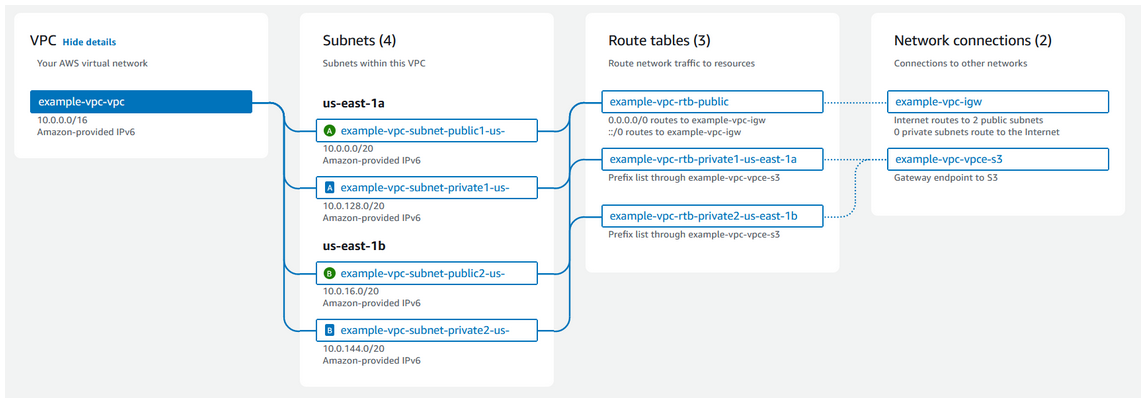

Ele é composto de:

+ 1 VPC
+ 4 Subnets (sendo uma de cada tipo de IP em 2 AZ distintas)
+ 3 Route Tables
+ 1 Internet Gateway
+ 1 Gateway Endpoint

O motivo de vermos o trafego indo para conexões de rede (Network Connections) é porque o exemplo seleciounou o Internet Gateway

**O diagrama nos dá a informação de que o tráfego de subnets publicas estão sendo direcionados para a internet, isto por conta da correspondência entre as Subnets, Route Tables e Network Connections**